<a href="https://colab.research.google.com/github/catprog-kspl/Curso.Prep.Henry/blob/master/pruebaOjos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Importamos las librerias
import cv2
from google.colab.patches import cv2_imshow
from skimage import color
#Cargamos la imagen
img = cv2.imread('cara2.jpg', cv2.IMREAD_UNCHANGED)
#Pasamos la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [27]:
#Llamamos a la función el clasificador que vamos a utilizar
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
boca_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml')
#Verificamos que esten cargados los datos
eye_cascade.empty()



False

In [28]:
boca_cascade.empty()

False

In [29]:
#Se detectan los ojos
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
boca = boca_cascade.detectMultiScale(gray, 1.3, 5)

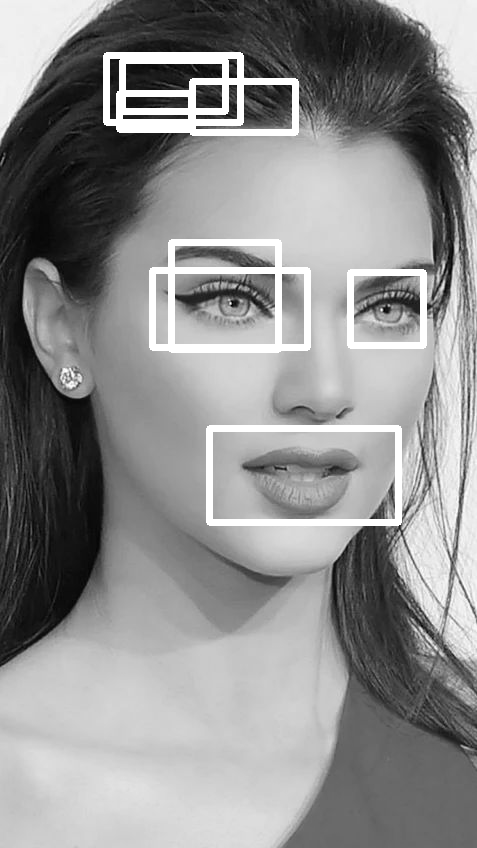

Este es el ojo derecho


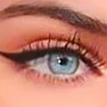

Este es el ojo izquierdo


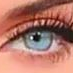

Esta es la boca


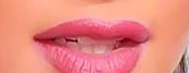

In [33]:
#Creamos una lista para guardar los dos ojitos
eyes2 = []

#Se crea un for para poder encerrar en una figura cada uno de los ojos
for (ex,ey,ew,eh) in eyes:
            #La figura es un rectangulo
            cv2.rectangle(gray,(ex,ey),(ex+ew,ey+eh),(255,0,0),5)
            #se gusdan los datos de la imagen con los tamaños determinados
            eyes2.append(img[ey:ey + eh, ex:ex + ew] )
          
for (bx,by,bw,bh) in boca:
            #La figura es un rectangulo
            cv2.rectangle(gray,(bx,by),(bx+bw,by+bh),(255,0,0),5)
            #se gusdan los datos de la imagen con los tamaños determinados
            bocas= img[by:by + eh, bx:bx + bw]  

#muestro la imagen con los ojos identificados   
cv2_imshow(gray) 
#la muestro
print("Este es el ojo derecho")
cv2_imshow(eyes2[0]) 
#la guardo
#cv2.imwrite('eyesR.jpg',eyes2[0]) 
print("Este es el ojo izquierdo")
cv2_imshow(eyes2[1]) 
#cv2.imwrite('eyesL.jpg',eyes2[1]) 
print("Esta es la boca")
cv2_imshow(bocas) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#Calculo de glcm

import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy

rgbImg = io.imread('eyesL.jpg')
grayImg = img_as_ubyte(color.rgb2gray(rgbImg))

distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
properties = ['energy', 'homogeneity']

glcm = greycomatrix(grayImg, 
                    distances=distances, 
                    angles=angles,
                    symmetric=True,
                    normed=True)

feats = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])

In [12]:
entropy(grayImg)

5.1435641069707625

In [13]:
np.set_printoptions(precision=4)

In [14]:
print(feats)

[0.0245 0.0198 0.0212 0.0198 0.0203 0.0198 0.0171 0.0198 0.0183 0.0164
 0.0155 0.0162 0.2185 0.1394 0.16   0.1486 0.1502 0.1394 0.0937 0.1486
 0.1235 0.0815 0.0673 0.087 ]
